# MACHINE LEARNING ASSIGNMENT 1

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import string
import random
import re

<b> Data Cleaning and pre-processing

In [399]:
# First removing the escape characters from the data.
def remove_escape_sequence(s):
    '''This function removes the escape sequence characters from the string'''
    s=s.replace('\n','')
    s=s.replace('\t','')
    s=s.replace('\a','')
    s=s.replace('\b','')
    s=s.replace('\f','')
    s=s.replace('\r','')
    s=s.replace('\v','')
    return s

# Removing the label from sentences.
def remove_label(s):
    '''This function removes the labels from the sentences.'''
    s=s.replace(s[-1],'')
    return s

# This function remove special characters from the string.
def remove_special_characters(s):
    '''This function removes the special characters from the string'''
    l=['!','"','#','$','%','&','(',')','*','+',',','-','/','.','`','~','@','^','_','=',':',';','<','>','{','}','[',']']
    for character in l:
        s=s.replace(character,' ')
    return s



################################################################################
'''Referred to NLTLK list of stop_words to get the the words which are not useful for classification'''

#[1] https://gist.github.com/sebleier/554280
################################################################################

# This function removes the stop words from the string.
def remove_stop_words(s):
    '''This function removes the stop words from the string'''
    stop_words=set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])
    l=[]
    for word in s.split():
        if word not in stop_words:
            l.append(word)
    s_new=' '.join(word for word in l)
    return s_new

#def to_lower_case
#def alphanumeric
#def lemmatisation (optional)

<b> Returns processed data and labels

In [400]:
def get_data(fr):
    '''This function returns data and labels after processing it and converting it into suitable form for Naive Bayes'''
    list_of_sentences=fr.readlines()
    random.seed(565)
    list_of_sentences=random.sample(list_of_sentences,len(list_of_sentences))
    
    
    labels=[]
    for i in range(0,len(list_of_sentences)):
        labels.append(int(list_of_sentences[i][-2]))
    
    data=[]
    for sentence in list_of_sentences:
        sentence_updated=remove_escape_sequence(sentence)
        sentence_updated=remove_label(sentence_updated)
        sentence_updated=remove_special_characters(sentence_updated)
        sentence_updated=sentence_updated.lower()
        sentence_updated=remove_stop_words(sentence_updated)
        s=sentence_updated.split()
        data.append(s)
    return data,labels

<b> Naive Bayes Functions

In [401]:
# A function to calculate the counts of each feature from the training set.
def Naive_Bayes(X_train,Y_train): 
    '''This function calculates the count of each words in the document corpus and collects the information in a di
    named information.'''
    information=dict()
    k=0
    total_positive_words=0
    total_negative_words=0
    for i in range(len(X_train)):
        sentence=X_train[i]
        for j in range(len(sentence)):
            word=sentence[j]
            if word not in information:
                information[word]=[0,0,k]
                k+=1
            if Y_train[i]==0:
                information[word][0]+=1
                total_negative_words+=1
            else:
                information[word][1]+=1
                total_positive_words+=1
    return information,total_positive_words,total_negative_words



def calculate_probabilities(Y_train,information,total_positive_words,total_negative_words,smoothing_factor=0):
    '''This function takes in the information obtained by Naive_Bayes function and calculates conditional probabilities
    of the words in the training dataset'''
    conditional_prob_0=dict()
    conditional_prob_1=dict()
    prob_y_1=sum(Y_train)/len(Y_train)
    prob_y_0=1-prob_y_1
    features=len(information.keys())
    for word in information:
        conditional_prob_0[word]=(information[word][0]+smoothing_factor)/(total_negative_words+features*smoothing_factor)
        conditional_prob_1[word]=(information[word][1]+smoothing_factor)/(total_positive_words+features*smoothing_factor)
    
    return conditional_prob_0,conditional_prob_1,prob_y_1,prob_y_0



def get_probabilities(X,conditional_prob_0,conditional_prob_1,prob_y_0,prob_y_1):
    '''This function uses the conditional probabilities generated by calculate_probabilities function and returns probabilites 
    for a sentence belonging to either class 1 or 0'''
    X_test_predict_0=[]
    X_test_predict_1=[]
    for sentence in X:
        a=0
        b=0
        test_prob_0=np.log(prob_y_0) if prob_y_0!=0 else -1
        if(test_prob_0==-1):
            a=-1
        test_prob_1=np.log(prob_y_1) if prob_y_1!=0 else -1
        if(test_prob_1==-1):
            b=-1
        for word in sentence:
            if(word in conditional_prob_0): # If word is not present in training data, we will just ignore it for the test data.
                if(conditional_prob_0[word]!=0):
                    test_prob_0+=np.log(conditional_prob_0[word])
                else:
                    a=-1
                if(conditional_prob_1[word]!=0):
                    test_prob_1+=np.log(conditional_prob_1[word])
                else:
                    b=-1
                    
        if(a==-1):
            test_prob_0=float('-inf')
        if(b==-1):
            test_prob_1=float('-inf')
        X_test_predict_0.append(test_prob_0)
        X_test_predict_1.append(test_prob_1)
    return X_test_predict_0,X_test_predict_1


def predict(X_test_predict_0,X_test_predict_1):
    '''This function predicts the label of the sentence based on the probabilities of the sentence belonging to class 0 and 1 '''
    y_predict=[]
    for i in range(0,len(X_test_predict_0)):
        if(X_test_predict_0[i]==float('-inf') and X_test_predict_1[i]==float('-inf')): # classiying ambiguous points as negative
            y_predict.append(0)
        elif(X_test_predict_0[i]>=X_test_predict_1[i]):
            y_predict.append(0)
        else:
            y_predict.append(1)
    return y_predict

def accuracy(Y,Y_predict):
    ''' This function uses the accuracy metric to determine how well aor algorithm is performing.'''
    score=0
    for i in range(0,len(Y)):
        if(Y[i]==Y_predict[i]):
            score+=1
    return score/len(Y)


def apply_naive_bayes(X_train,Y_train,X_test,Y_test,m):
    '''This function basically calls all the necessary functions defined above and returns the accuracy score. Think of it like a black
    box which recieves training and test datasets and corresponding labels and returns the accuracy of our algorithm.'''
    information,\
    total_positive_words,\
    total_negative_words=Naive_Bayes(X_train,Y_train)
    
    conditional_prob_0,\
    conditional_prob_1,\
    prob_y_1,\
    prob_y_0=calculate_probabilities(Y_train,information,total_positive_words,total_negative_words,smoothing_factor=m)

    X_test_predict_0,\
    X_test_predict_1=get_probabilities(X_test,conditional_prob_0,conditional_prob_1,prob_y_0,prob_y_1)

    Y_predict=predict(X_test_predict_0,X_test_predict_1)
    score=accuracy(Y_test,Y_predict)
    return score

<b> Data manipulation functions

In [402]:
def split_data(X,Y): # Splits dataset into 2 datasets.
    '''This function splits the dataset on the basis of the class.'''
    X_positive=[]
    X_negative=[]
    for i in range(0, len(X)):
        if(Y[i]==1):
            X_positive.append(X[i])
        else:
            X_negative.append(X[i])
    return X_positive,X_negative

def calculate_indices(n,folds=10): # calculates start and end indices for a 10 fold cross validation
    '''This function calculates the start and end indices of the cross validation test dataset which will be useful for splitting the
    data.'''
    start_index=0
    end_index=int(n/folds)
    test_index=[]
    current_fold=1
    while current_fold<=folds:
        #print(str(start_index)+",\t,"+str(end_index))
        test_index.append((start_index,end_index))
        start_index=end_index
        end_index=end_index+int(n/folds)
        current_fold+=1
        
    return test_index


def test_data_indices(n,test_ratio=.3):
    '''This function, though not used in the code, returns the test indices if we perform stratified train and test split on the basis of
    the percentage of data to retain in training se.'''
    test_index=[(0,int(.3*n))]
    return test_index


def train_test_split(X,Y,test_start_index,test_end_index): #Splits data into training nad test datasets.
    '''This function splits the dataset into trainig and test datasets such that the ratio of classes in both the datasets is same.'''
    X_train=[]
    Y_train=[]
    X_test=[]
    Y_test=[]
    k=0
    for i in range(0,len(X)):
        if(i>=test_start_index and i<test_end_index):
            X_test.append(X[i])
            Y_test.append(Y[i])
        else:
            X_train.append(X[i])
            Y_train.append(Y[i])
    return X_train,X_test,Y_train,Y_test
        
def dataset_combine(X1,X2):
    '''This function combine 2 datasets'''
    return X1+X2

def randomize(X,Y):
    '''This function perform random reordering of the dataset'''
    X_=[]
    Y_=[]
    l=np.arange(0,len(X))
    l=np.random.permutation(l)
    for i in l:
        X_.append(X[i])
        Y_.append(Y[i])
    return X_,Y_

def get_subset(X,Y,n):
    '''This function generates random subset of data from the dataset'''
    X,Y=randomize(X,Y)
    X_=[]
    Y_=[]
    for i in range(0,n):
        X_.append(X[i])
        Y_.append(Y[i])
    return X_,Y_

<b> K fold function for experiment 1

In [403]:
def K_fold_exp1(X_train,Y_train,folds=10):
    '''This function implements the kfold for experiment 1'''
    X_train_positive,X_train_negative=split_data(X_train,Y_train)
    Y_train_positive=[1]*len(X_train_positive)
    Y_train_negative=[0]*len(X_train_negative)
    
    
    alpha=[1,2]
    m=[i-1 for i in alpha]
    score=dict()
    test_index_positive=calculate_indices(len(X_train_positive),folds)
    test_index_negative=calculate_indices(len(X_train_negative),folds)

    for i in range(0,folds):
        X_train_cv_positive,\
        X_test_cv_positive,\
        Y_train_cv_positive,\
        Y_test_cv_positive\
        =train_test_split(X_train_positive,Y_train_positive,test_index_positive[i][0],test_index_positive[i][1])

        X_train_cv_negative,\
        X_test_cv_negative,\
        Y_train_cv_negative,\
        Y_test_cv_negative\
        =train_test_split(X_train_negative,Y_train_negative,test_index_negative[i][0],test_index_negative[i][1])


        X_train_cv=dataset_combine(X_train_cv_positive,X_train_cv_negative)
        Y_train_cv=dataset_combine(Y_train_cv_positive,Y_train_cv_negative)
        X_test_cv=dataset_combine(X_test_cv_positive,X_test_cv_negative)
        Y_test_cv=dataset_combine(Y_test_cv_positive,Y_test_cv_negative)

        size=[int(i*len(X_train_cv)) for i in np.round(np.arange(.1,1,.1),1)]
        for j in range(0,len(size)):
            for k in range(0,len(m)):
                X_train_subset,Y_train_subset=get_subset(X_train_cv,Y_train_cv,size[j])
                score[(i,j,k)]=apply_naive_bayes(X_train_subset,Y_train_subset,X_test_cv,Y_test_cv,m[k])
    avg_score=np.zeros((len(size),len(m)))
    standard_deviation=np.zeros((len(size),len(m)))
    
    for k in range(0,len(m)):
        for j in range(0,len(size)):
            s=0
            temp=np.zeros(folds)
            for i in range(0,folds):
                s+=score[(i,j,k)]
                temp[i]=score[(i,j,k)]
            avg_score[j][k]=s/folds
            standard_deviation[j][k]=np.std(temp)
            
    return avg_score,standard_deviation,size

<b> Kold for experiment 2

In [404]:
def K_fold_exp2(X_train,Y_train,folds=10):
    '''This function implements the k-fold for the experiment 2'''
    X_train_positive,X_train_negative=split_data(X_train,Y_train)
    Y_train_positive=[1]*len(X_train_positive)
    Y_train_negative=[0]*len(X_train_negative)
    
    
    m1=np.round(np.arange(0,1,.1),2)
    m=np.append(m1,np.arange(1,11))
    score=dict()
    test_index_positive=calculate_indices(len(X_train_positive),folds)
    test_index_negative=calculate_indices(len(X_train_negative),folds)

    for i in range(0,folds):
        X_train_cv_positive,\
        X_test_cv_positive,\
        Y_train_cv_positive,\
        Y_test_cv_positive\
        =train_test_split(X_train_positive,Y_train_positive,test_index_positive[i][0],test_index_positive[i][1])

        X_train_cv_negative,\
        X_test_cv_negative,\
        Y_train_cv_negative,\
        Y_test_cv_negative\
        =train_test_split(X_train_negative,Y_train_negative,test_index_negative[i][0],test_index_negative[i][1])


        X_train_cv=dataset_combine(X_train_cv_positive,X_train_cv_negative)
        Y_train_cv=dataset_combine(Y_train_cv_positive,Y_train_cv_negative)
        X_test_cv=dataset_combine(X_test_cv_positive,X_test_cv_negative)
        Y_test_cv=dataset_combine(Y_test_cv_positive,Y_test_cv_negative)
        
        for k in range(0,len(m)):
            score[(i,k)]=apply_naive_bayes(X_train_cv,Y_train_cv,X_test_cv,Y_test_cv,m[k])
            
    avg_score=np.zeros(len(m))
    standard_deviation=np.zeros(len(m))
    for k in range(0,len(m)):
        temp=np.zeros(folds)
        for i in range(0,folds):
            avg_score[k]+=score[(i,k)]
            temp[i]=score[(i,k)]
        avg_score[k]/=folds
        standard_deviation[k]=np.std(temp)
    return avg_score,standard_deviation

<b> Plotting Functions

In [405]:
def plot_graph_exp1(X,Y,std_dev):
    '''This function plots the necessary graphs for the experiment 1'''
    plt.figure(1,figsize=(10,10))
    
    plt.subplot(211)
    plt.scatter(X,Y[:,0],color='b')
    plt.scatter(X,Y[:,1],color='g')
    lines=plt.plot(X,Y[:,0],X,Y[:,1])
    plt.setp(lines[0],color='b',linewidth=1.0,label='m=0')
    plt.setp(lines[1],color='g',linewidth=3.0,label='m=1')
    plt.xlabel("Training data size")
    plt.ylabel("Accuracy")
    plt.title('Variation of accuracy for different values of m as training size increases')
    plt.legend()
    plt.grid()
    
    plt.subplot(212)
    plt.scatter(X,Y[:,0],color='b')
    plt.scatter(X,Y[:,1],color='g')
    line1=plt.errorbar(X,Y[:,0],yerr=std_dev[:,0])
    line2=plt.errorbar(X,Y[:,1],yerr=std_dev[:,1])
    plt.setp(line1,color='b',linewidth=1.0,label='m=0')
    plt.setp(line2,color='g',linewidth=3.0,label='m=1')
    plt.xlabel("Training data size")
    plt.ylabel("Average Accuracy")
    plt.title('Error bar plot of average acccuracies as a function of training data size')
    plt.legend()
    plt.grid()
    plt.show()

def plot_graph_exp2(X,Y,std_dev):
    '''This function plots the necessary graphs for the experiment 2.'''
    plt.figure(2,figsize=(10,10))
    
    plt.subplot(211)
    plt.scatter(X,Y)
    line=plt.plot(X,Y)
    plt.setp(line,color='b',linewidth=1.0,label='m=0')
    plt.xlabel("value of smoothing factor")
    plt.ylabel("average Accuracy")
    plt.title('Variation of average accuracy as value of smoothing factor changes')
    plt.grid()
    
    plt.subplot(212)
    plt.scatter(X,Y)
    line=plt.errorbar(X,Y,yerr=std_dev)
    plt.xlabel("value of smoothing factor")
    plt.ylabel("average accuracy")
    plt.title("Error bar plot of average accuracy as a function of smoothing factor')")
    plt.grid()
    plt.show()

## 1) Experiment 1

### Dataset 1

In [406]:
fr=open("amazon_cells_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score=dict()
score,std_dev,size=K_fold_exp1(X_train,Y_train,folds=10)

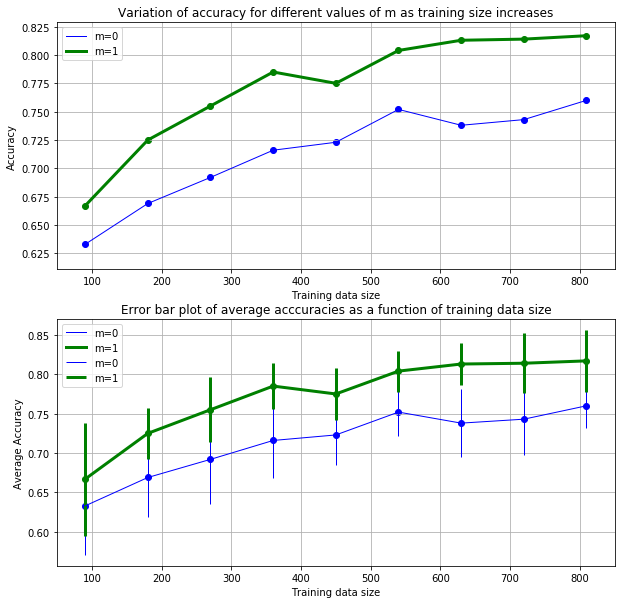

In [407]:
plot_graph_exp1(size,score,std_dev)

### Dataset 2

In [408]:
fr=open("imdb_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score=dict()
score,std_dev,size=K_fold_exp1(X_train,Y_train,folds=10)

In [409]:
plot_graph_exp1(size,score,std_dev)

### Dataset 3

In [410]:
fr=open("yelp_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score=dict()
score,std_dev,size=K_fold_exp1(X_train,Y_train,folds=10)

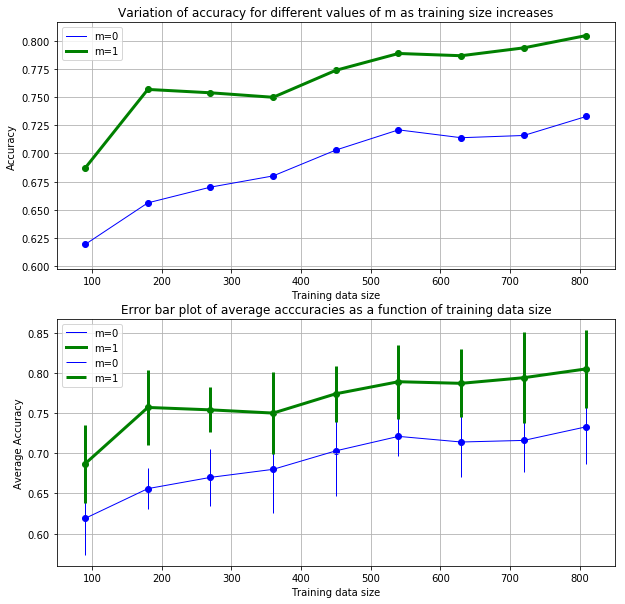

In [411]:
plot_graph_exp1(size,score,std_dev)

In [412]:
print(std_dev)

[[0.04504442 0.04838388]
 [0.0257682  0.04670118]
 [0.03521363 0.028     ]
 [0.05422177 0.0507937 ]
 [0.05675385 0.0346987 ]
 [0.02426932 0.04592385]
 [0.04386342 0.04243819]
 [0.03878144 0.05624944]
 [0.04583667 0.0484252 ]]


#### Observations:

1) From plot 1, We can see that as our accuracy significatly increases, if we assume a prior distribution(dirichelet) over the features with same alpha(2 ie m=1 in the given case) for all the features.Also,as the training data increases, the accuracy of our model is increasing.


2) The standard deviation of average accuracies decrease as we increase the training data size. As trainigng size increases, our model variance reduces since it will be able to learn from a larger data. If traing dataset is small, during each run the model will learn only partial information and hence will potentially differ from the model obtained in the second run.

## Experiment 2

In [413]:
m1=np.round(np.arange(0,1,.1),2)
m=np.append(m1,np.arange(1,11))

### Dataset 1

In [414]:
fr=open("amazon_cells_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score,std_dev=K_fold_exp2(X_train,Y_train,folds=10)

In [415]:
plot_graph_exp2(m,score,std_dev)

#### Observation: 

### Dataset 2

In [416]:
fr=open("imdb_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score,std_dev=K_fold_exp2(X_train,Y_train,folds=10)

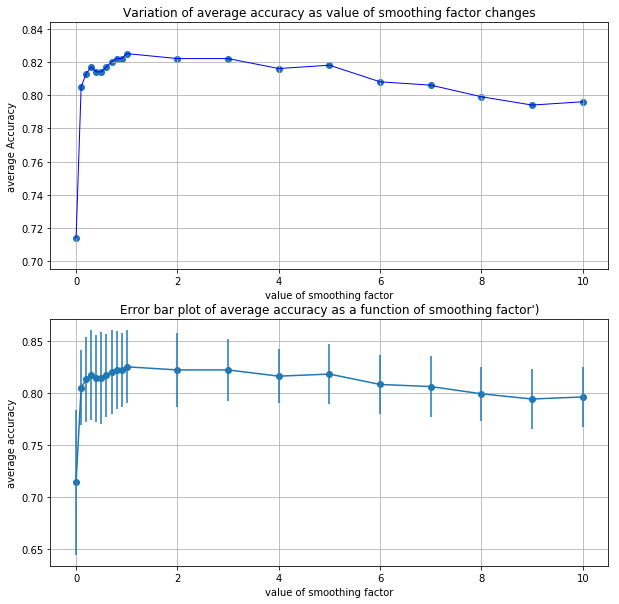

In [417]:
#print(score)
plot_graph_exp2(m,score,std_dev)

### Dataset 3

In [418]:
fr=open("yelp_labelled.txt","r")
data,labels=get_data(fr)

X_train=data
Y_train=labels

score,std_dev=K_fold_exp2(X_train,Y_train,folds=10)

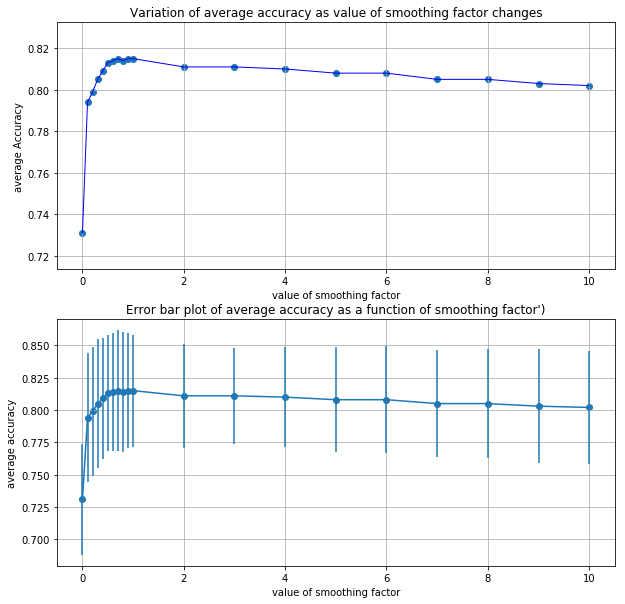

In [419]:
plot_graph_exp2(m,score,std_dev)

In [420]:
print(std_dev)

[0.04276681 0.04983974 0.05008992 0.04984977 0.047      0.04495553
 0.04565085 0.04695743 0.04651881 0.04432832 0.04341659 0.04036087
 0.037      0.03847077 0.0404475  0.04118252 0.04153312 0.04224926
 0.04428318 0.044     ]


#### Observations:
1) As we increase the value of smoothing factor(m) upto approximately 1, the accuracy is increasing. This can be interpreted in this way. Small value of m implies we have little prior information about our distribution of features but noetheless we have some information. Using both data and prior information, we are getting highr accuracy.

However, as we increase the value of m, we are ignoring the information present in the training data and relying more and more on our prior knowledge. And hence , the bias of our model increases significantly due to which the accuracy reduces.

2) As we increase m, we are kind of relying more and more on our prior distribution. This means our data becomes less important and hence the standard deviation will reduce as we increase m significantly.